# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=b51d13ba3e75871d5a3028599b0fa3b39c614a2215ead305acf1a21e75ea673a
  Stored in directory: c:\users\alext\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


record = 1
city_record= 1

# Header print statement
print(f"Beginning Data Retrieval")
print(f"-"*30)

#Loop through the cities in the city list by making requests and storing response
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #city_record = response["name"]
        
        
        print(f"Processing Record {record} of Set {city_record}  | {response ['name']}")

        
        if record == 50 : 
            city_record= city_record + 1
            record = 0
        

        record= record + 1

    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1  | Kanniyākumāri
Processing Record 2 of Set 1  | Coquimbo
Processing Record 3 of Set 1  | Ushuaia
Processing Record 4 of Set 1  | Barrow
Processing Record 5 of Set 1  | Saint-Paul
Processing Record 6 of Set 1  | Mizdah
Processing Record 7 of Set 1  | Rikitea
Processing Record 8 of Set 1  | Albany
Processing Record 9 of Set 1  | Dunda
Processing Record 10 of Set 1  | Pacific Grove
Processing Record 11 of Set 1  | Kapaa
Processing Record 12 of Set 1  | Flinders
Processing Record 13 of Set 1  | Qaanaaq
Processing Record 14 of Set 1  | Nikolskoye
Processing Record 15 of Set 1  | Puerto Ayora
City not found. Skipping...
Processing Record 16 of Set 1  | Mitsamiouli
Processing Record 17 of Set 1  | Rāzole
Processing Record 18 of Set 1  | New Norfolk
Processing Record 19 of Set 1  | George Town
Processing Record 20 of Set 1  | Chui
Processing Record 21 of Set 1  | Punta Arenas
Processing Record 22 of Set 1  | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data= {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country":country,
    "Date": date,
}

weather_df= pd.DataFrame(weather_data)
weather_df
#save as csv

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kanniyākumāri,8.08,77.57,80.17,76,98,16.35,IN,1605837943
1,Coquimbo,-29.95,-71.34,54.68,83,33,2.06,CL,1605837911
2,Ushuaia,-54.80,-68.30,50.00,66,40,12.75,AR,1605837943
3,Barrow,71.29,-156.79,21.20,85,90,13.87,US,1605837943
4,Saint-Paul,-21.01,55.27,69.80,60,40,5.82,RE,1605837944
...,...,...,...,...,...,...,...,...,...
539,Rutana Province,-3.87,30.10,56.86,99,7,2.80,BI,1605838117
540,Margate,51.38,1.39,42.01,60,0,1.01,GB,1605838118
541,Palmer,42.16,-72.33,42.01,56,75,8.05,US,1605838118
542,Amuntai,-2.42,115.25,92.97,51,10,0.65,ID,1605838118


In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.230938,19.851801,55.849044,74.775735,50.992647,8.552408,1.605838e+09
std,33.330283,91.036734,25.082427,18.278420,40.191896,6.358179,8.534029e+01
min,-54.800000,-179.170000,-14.800000,15.000000,0.000000,0.220000,1.605838e+09
25%,-9.457500,-65.152500,37.360000,66.000000,3.000000,3.845000,1.605838e+09
50%,21.125000,26.650000,62.820000,79.000000,52.000000,6.930000,1.605838e+09
75%,47.212500,101.130000,75.952500,89.000000,92.000000,11.410000,1.605838e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,47.200000,1.605838e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"]>100].index

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df=weather_df.loc[weather_df["Humidity"]<=100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

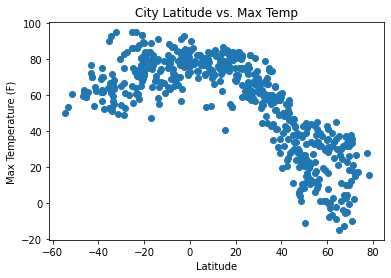

In [9]:
lat_scatter_plot("Max Temp", "Max Temperature (F)")

## Latitude vs. Humidity Plot

In [10]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

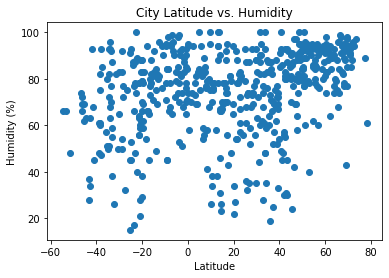

In [11]:
lat_scatter_plot("Humidity", "Humidity (%)")

## Latitude vs. Cloudiness Plot

In [12]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

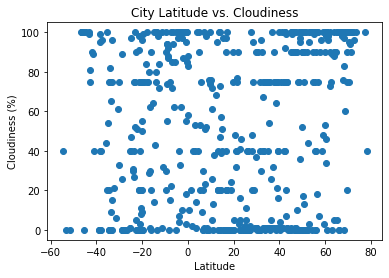

In [13]:
lat_scatter_plot("Cloudiness", "Cloudiness (%)")

## Latitude vs. Wind Speed Plot

In [14]:
def lat_scatter_plot(y_axis, y_label):
    x_axis= weather_df["Lat"]
    plt.scatter(x_axis, weather_df[y_axis])
    
    plt.title(f'City Latitude vs. {y_axis}')
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    plt.show()

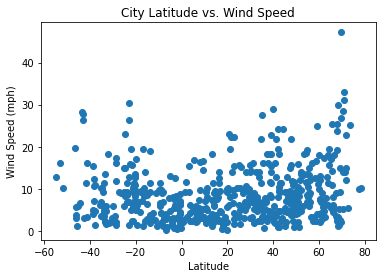

In [15]:
lat_scatter_plot("Wind Speed", "Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


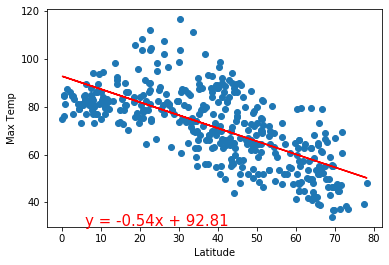

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


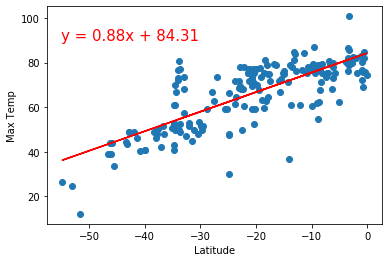

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


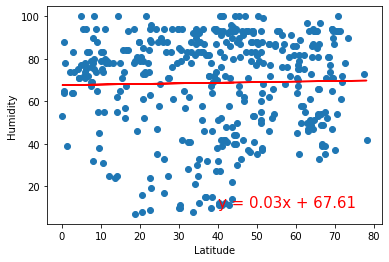

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


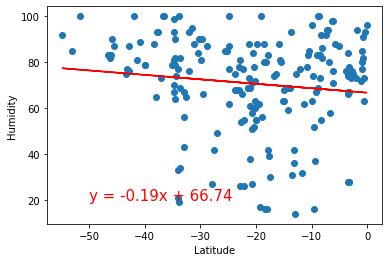

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


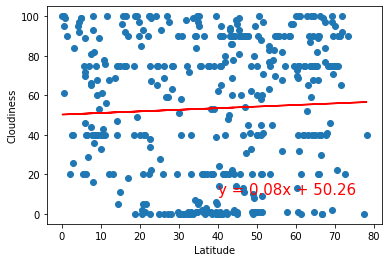

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


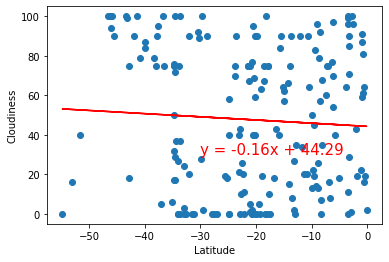

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


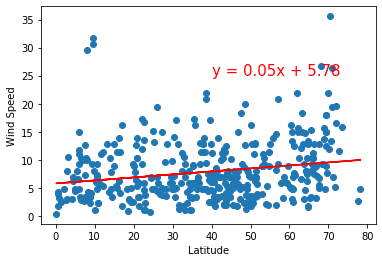

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


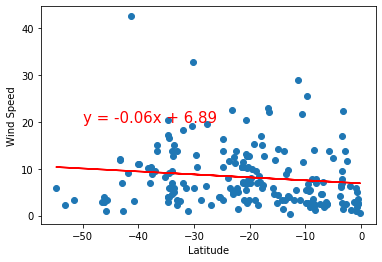